In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=6.538688551816595 et b_1=4.991247996702649


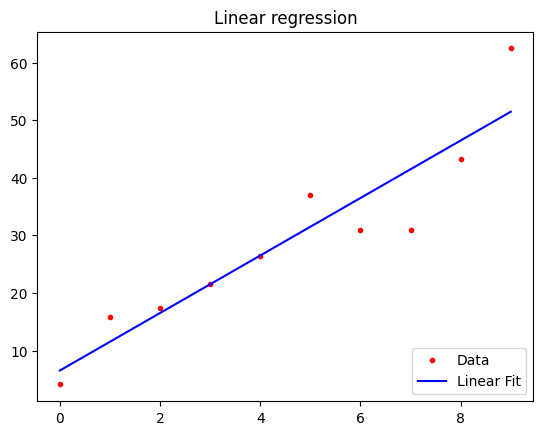

In [2]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



Jeux de données avec outlier
b_0=7.4026226559176465 et b_1=4.779559514326422


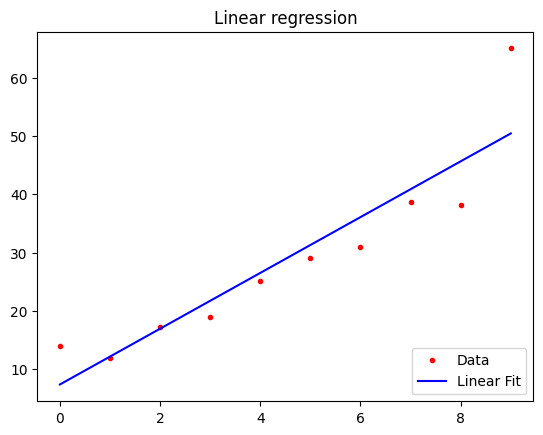

b_0=5.609901916480819 et b_1=5.658741648197576


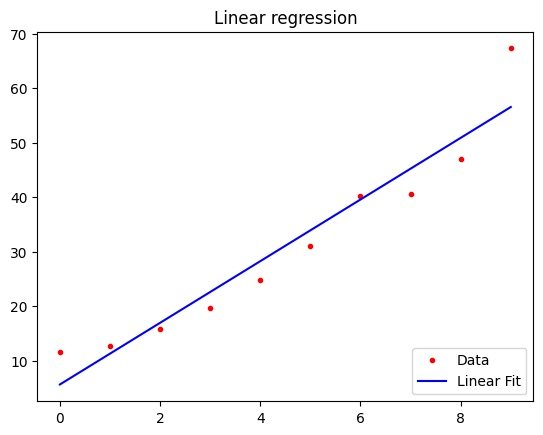

b_0=9.388426551699151 et b_1=4.7410094069778825


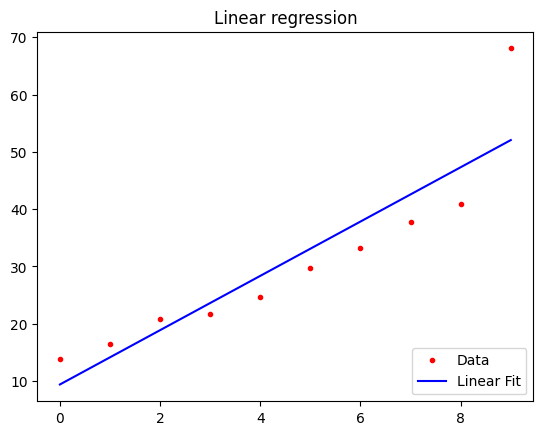

b_0=3.2530241899688477 et b_1=5.819367993045893


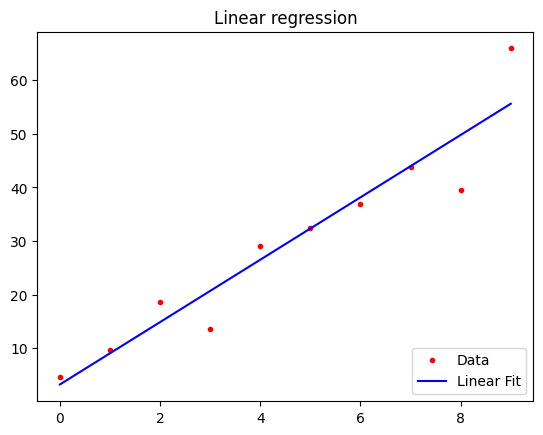

b_0=6.090934544246412 et b_1=5.642882507207642


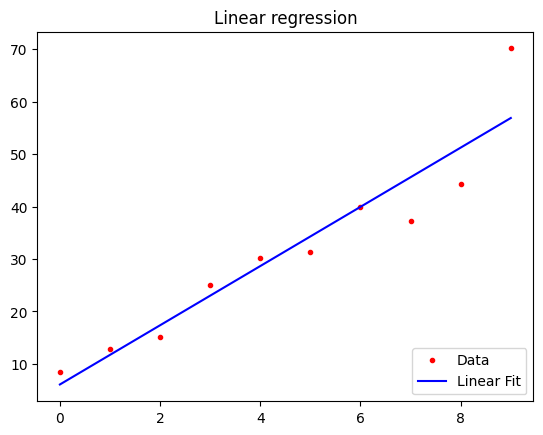

In [ ]:
b0_outlier = []
b1_outlier = []
s2_outlier = []

print("Jeux de données avec outlier")
for i in range(5):
    x, y = generate_data(n_samples=10, outlier=True)
    # instanciation de sklearn.linear_model.LinearRegression
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

    # representation du resultat
    b0_outlier.append(str(lr.intercept_))
    b1_outlier.append(str(lr.coef_[0]))
    s2_outlier.append(s2(y_true=y,y_pred=lr.predict(x[:, np.newaxis])))
    print('b_0='+b0_outlier[-1]+' et b_1='+b1_outlier[-1])

    fig = plt.figure()
    plt.plot(x, y, 'r.')
    plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
    plt.legend(('Data', 'Linear Fit'), loc='lower right')
    plt.title('Linear regression')
    plt.show()

Jeux de données sans outlier
b_0=12.329578584309012 et b_1=3.5028889408372055


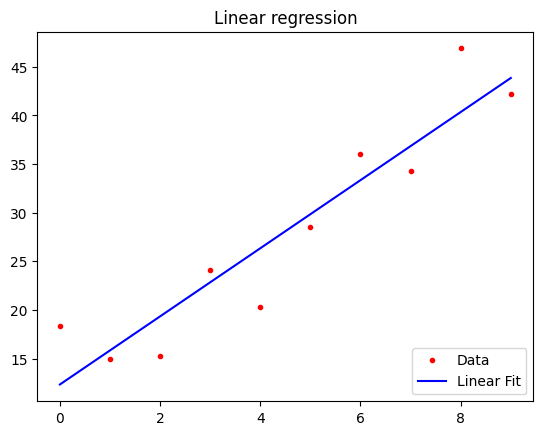

b_0=10.03185168466067 et b_1=3.7112974921428132


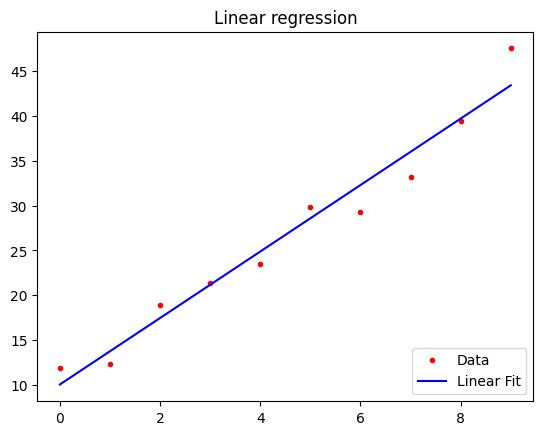

b_0=11.550985867530965 et b_1=3.979342633437581


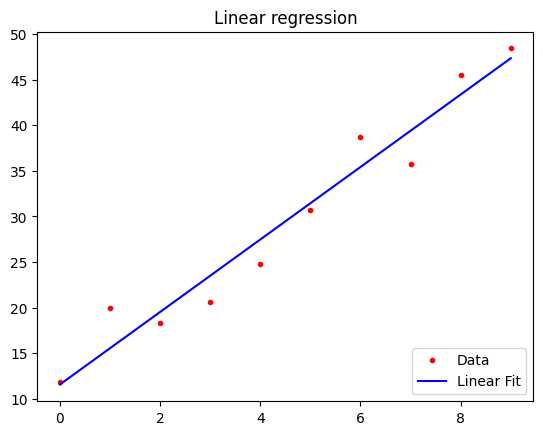

b_0=9.686086992114067 et b_1=4.106674808570788


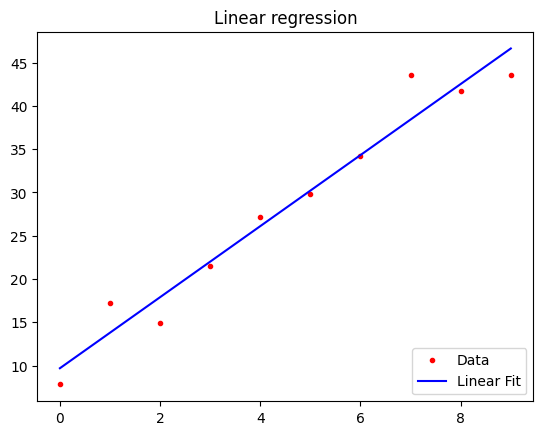

b_0=10.434771935492762 et b_1=3.781691957626658


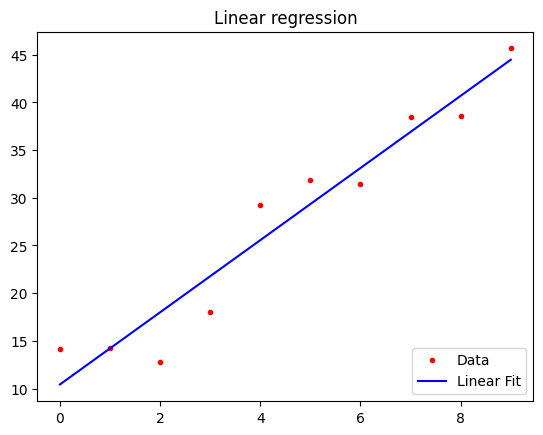

In [7]:
print("Jeux de données sans outlier")

b0_no_outlier = []
b1_no_outlier = []
s2_no_outlier = []

for i in range(5):
    x, y = generate_data(n_samples=10, outlier=False)
    # instanciation de sklearn.linear_model.LinearRegression
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

    # representation du resultat
    b0_no_outlier.append(str(lr.intercept_))
    b1_no_outlier.append(str(lr.coef_[0]))
    s2_no_outlier.append(s2(y_true=y,y_pred=lr.predict(x[:, np.newaxis])))
    print('b_0='+b0_no_outlier[-1]+' et b_1='+b1_no_outlier[-1])

    fig = plt.figure()
    plt.plot(x, y, 'r.')
    plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
    plt.legend(('Data', 'Linear Fit'), loc='lower right')
    plt.title('Linear regression')
    plt.show()

In [8]:
b0_outlier

['7.4026226559176465',
 '5.609901916480819',
 '9.388426551699151',
 '3.2530241899688477',
 '6.090934544246412']

In [15]:
b0_no_outlier

['12.329578584309012',
 '10.03185168466067',
 '11.550985867530965',
 '9.686086992114067',
 '10.434771935492762']

$\beta_{0}$ est biaisé avec l'outlier et dévie de sa valeur théorique ($\beta_{0}=10$)

In [11]:
b1_outlier

['4.779559514326422',
 '5.658741648197576',
 '4.7410094069778825',
 '5.819367993045893',
 '5.642882507207642']

In [10]:
b1_no_outlier

['3.5028889408372055',
 '3.7112974921428132',
 '3.979342633437581',
 '4.106674808570788',
 '3.781691957626658']

$\beta_{1}$ est biaisé avec l'outlier et dévie de sa valeur théorique ($\beta_{1}=3$)

In [12]:
s2_outlier

[np.float64(39.75045701998002),
 np.float64(24.317795731039304),
 np.float64(44.46699115575993),
 np.float64(31.594123151980778),
 np.float64(35.448736448830054)]

In [13]:
s2_no_outlier

[np.float64(16.863756790022506),
 np.float64(4.989808733360915),
 np.float64(7.384134355507012),
 np.float64(6.951484213097052),
 np.float64(9.53743381638782)]

$s2$ est biaisée avec l'outlier et est bien plus importante que sa valeur théorique ($s2=3$)

La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  $\hat{y_{(i)j}}$ est l'estimation de $y_j$ à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [16]:
x, y = generate_data(n_samples=10, outlier=True)

In [17]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [ ]:
def profil_residuel(x, y, i):
    lr_i = LinearRegression()
    lr_i.fit(np.delete(x,i)[:, np.newaxis], np.delete(y,i))

    return y - lr_i.predict(x[:, np.newaxis])

In [26]:
eij = []
for i in range(len(x)):
    eij.append(profil_residuel(x,y,i))
eij = np.array(eij)
eij

array([[-0.26101109,  3.76073736,  1.1762707 ,  4.53186399, -4.55373251,
        -3.51702484, -3.73606452, -6.24589098, -4.97424036, 13.55808115],
       [ 1.31431813,  5.10524352,  2.28995381,  5.41472404, -3.90169552,
        -3.09581091, -3.54567364, -6.28632316, -5.2454956 , 13.05600285],
       [ 0.18416083,  4.14615892,  1.5019419 ,  4.79778483, -4.34756203,
        -3.37060472, -3.64939476, -6.21897157, -5.00707132, 13.46549983],
       [ 0.78318149,  4.69529046,  2.00118433,  5.24713813, -3.94809784,
        -3.02102966, -3.34970882, -5.96917475, -4.80716362, 13.61551841],
       [-0.81226775,  3.22578774,  0.65762812,  4.02952844, -5.03976102,
        -3.98674631, -4.18947896, -6.68299837, -5.39504072, 13.15358782],
       [-0.45446867,  3.5294074 ,  0.90706835,  4.22478925, -4.89867964,
        -3.89984436, -4.15675643, -6.70445527, -5.47067705, 13.02377207],
       [-0.24857943,  3.68119624,  1.00475681,  4.26837731, -4.90919196,
        -3.96445707, -4.27546953, -6.87726876

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [27]:
eij[:,9]

array([13.55808115, 13.05600285, 13.46549983, 13.61551841, 13.15358782,
       13.02377207, 12.7427578 , 11.72629304, 11.58541836, 20.65573262])

In [28]:
eij[:,:-1]

array([[-0.26101109,  3.76073736,  1.1762707 ,  4.53186399, -4.55373251,
        -3.51702484, -3.73606452, -6.24589098, -4.97424036],
       [ 1.31431813,  5.10524352,  2.28995381,  5.41472404, -3.90169552,
        -3.09581091, -3.54567364, -6.28632316, -5.2454956 ],
       [ 0.18416083,  4.14615892,  1.5019419 ,  4.79778483, -4.34756203,
        -3.37060472, -3.64939476, -6.21897157, -5.00707132],
       [ 0.78318149,  4.69529046,  2.00118433,  5.24713813, -3.94809784,
        -3.02102966, -3.34970882, -5.96917475, -4.80716362],
       [-0.81226775,  3.22578774,  0.65762812,  4.02952844, -5.03976102,
        -3.98674631, -4.18947896, -6.68299837, -5.39504072],
       [-0.45446867,  3.5294074 ,  0.90706835,  4.22478925, -4.89867964,
        -3.89984436, -4.15675643, -6.70445527, -5.47067705],
       [-0.24857943,  3.68119624,  1.00475681,  4.26837731, -4.90919196,
        -3.96445707, -4.27546953, -6.87726876, -5.69759093],
       [ 0.10512912,  3.88266332,  1.0539824 ,  4.16536143, -5

On observe bien que le profil résiduel de la donnée aberrante est plus grand que pour les autres données et encore plus lorsque l'on calcule $e_{(9)9}$

#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [31]:
def cook(x, y, i):
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)

    s_2 = s2(y_pred=lr.predict(x[:, np.newaxis]), y_true=y)

    lr_i = LinearRegression()
    lr_i.fit(np.delete(x,i)[:, np.newaxis], np.delete(y,i))

    return np.sum((lr_i.predict(x[:, np.newaxis]) - lr.predict(x[:, np.newaxis]))**2)/(2*s_2)

In [33]:
di = []
for i in range(len(x)):
    di.append(cook(x,y,i))
np.array(di)

array([3.20201047e-04, 8.81143717e-02, 5.39428927e-03, 4.76753901e-02,
       3.56039984e-02, 2.13193244e-02, 3.16531468e-02, 1.37729112e-01,
       1.49528988e-01, 2.00533082e+00])

## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...